In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import stats

### Загружаем данные

In [5]:
item = 'OFP' # Выбрать из поля Item для вашего датасета
package = 'Ecdat' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head(10)

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff,age,black,sex,maried,school,faminc,employed,privins,medicaid,region,hlth
0,5,0,0,0,0,1,2,0,6.9,yes,male,yes,6,2.8810,yes,yes,no,other,other
1,1,0,2,0,2,0,2,0,7.4,no,female,yes,10,2.7478,no,yes,no,other,other
2,13,0,0,0,3,3,4,1,6.6,yes,female,no,10,0.6532,no,no,yes,other,poor
3,16,0,5,0,1,1,2,1,7.6,no,male,yes,3,0.6588,no,yes,no,other,poor
4,3,0,0,0,0,0,2,1,7.9,no,female,yes,6,0.6588,no,yes,no,other,other
5,17,0,0,0,0,0,5,1,6.6,no,female,no,7,0.3301,no,no,yes,other,poor
6,9,0,0,0,0,0,0,0,7.5,no,female,no,8,0.8280,no,yes,no,midwest,other
7,3,0,0,0,0,0,0,0,8.7,no,female,no,8,3.0456,no,yes,no,midwest,other
8,1,0,0,0,0,0,0,0,7.3,no,female,no,8,3.0456,no,yes,no,midwest,other
9,0,0,0,0,0,0,0,0,7.8,no,female,no,8,3.0456,no,yes,no,midwest,other


### себе для справки:
ofp
number of physician office visits

ofnp
number of nonphysician office visits

opp
number of physician outpatient visits

opnp
number of nonphysician outpatient visits

emr
number of emergency room visits

hosp
number of hospitalizations

numchron
number of chronic conditions

adldiff
the person has a condition that limits activities of daily living ?

age
age in years (divided by 10)

black
is the person African–American ?

sex
is the person male ?

maried
is the person married ?

school
number of years of education

faminc
family income in 10000$

employed
is the person employed ?

privins
is the person covered by private health insurance?

medicaid
is the person covered by medicaid ?

region
the region (noreast, midwest, west)

hlth
self-perceived health (excellent, poor, other)

### Далее идет ваше решение

Задание

1) Изучите внимательно ваш датасет и смысл переменных, которые в нем содержатся

2) Сформулируйте на базе переменных три вида гипотез:
    а) Выберите две категориальные переменные и сформулируйте гипотезу об их взаимосвязи
    б) Выберите одну категориальную и одну числовую переменную и сформулируйте гипотезу об их взаимосвязи
    в) Выберите две числовые переменные и сформулируйте гипотезу об их взаимосвязи
    
3) Для каждой гипотезы постарайтесь привести логический смысл, почему вы считаете, что эта взаимосвязь должна существовать и какую форму взаимосвязи вы ожидаете. Что это дает с практической точки зрения?

4) Для выбранных переменных проведите разведочный анализ данных. Приведите наиболее подходящие описательные статистики, частотные распределения, постройте графики, которые бы давали представление как о переменных по отдельности, так и об их взаимосвязи

5) Проведите очистку данных от пропусков, выбросов и некорректных значений любым выбранным способом. Постарайтесь обосновать этот способ.

6) Протестируйте распределение числовой переменной на соответствие нормальному. Постройте QQ-plot и гистограмму.

7) Проведите тесты гипотез из пункта (2) и сделайте выводы. Какой практический смысл имеют результаты проведенных тестов? Как их можно использовать?

8) Результат сохранить на GitHub и отправить в виде ссылки на файл + блокнота в формате ipynb

Помните, что просто посчитать - это половина задания. К каждому шагу нужны пояснения и описания. Старайтесь структурировать ваш код, чтобы он был понятен стороннуму пользователю!

# Решение:

# Гипотезы:

### 1. (две категориальные переменные): неработающие люди реже покупают частные страховки чем работающие (privins, employed)

### 2. (одна категориальная и одна числовая переменная): мужчины реже ходят к врачу (sex, ofp)

### 3. (две числовые переменные): чем старше человек тем чаще он обращается к врачу (ofp, age)

In [38]:
df.shape

(4406, 19)

In [40]:
cdf = df.dropna().copy()

In [42]:
cdf.shape

(4406, 19)

#### Ничего не дропнулось - значит NA нет

### Проверка 1й гипотезы

In [28]:
df.pivot_table(
        values = 'privins',
        #index = 'maried',
        columns = 'employed',
        aggfunc = 'count'
)

employed,no,yes
privins,3951,455


### Интересно: получается что нет данных для подтверждения нулевой гипотезы. Причем с очень существенным перевесом у "незанятых" людей больше частных страховок. Проверял - в группах женатых/неженатых все аналогично.

In [67]:
stats.chi2_contingency(
    df.pivot_table(
            values = 'privins',
            #index = 'maried',
            columns = 'employed',
            aggfunc = 'count'
    )    
)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([[3951.,  455.]]))

### Интресно что формальный тест говорит об обратном - зависимость есть т.к. pvalue меньше 5%

### Проверка 2й гипотезы:

In [63]:
df.pivot_table(
        values = 'ofp',
        columns = 'sex',
        aggfunc = 'sum'
)

sex,female,male
ofp,15805,9637


Гипотеза подтвердилась/ Почти в два раза мужчины реже обращаются к врачу. На всякий случай проверю на предмет женат/неженат. Моежт быть влияние партнера в браке.

In [71]:
df.pivot_table(
        values = 'ofp',
        index = 'maried',
        columns = 'sex',
        aggfunc = 'sum'
)

sex,female,male
maried,,
no,10087,1776
yes,5718,7861


Вот это поворот - явная гетерогенность результатов - женатые мужчины чаще неженатых образаются к варчу, более того - чаще замужних женщин!

Получается статистику всем мужчинам "портят" неженатые) так появляются стереотипы что мужчины не ходят к варчу.

### Проверка 3й гипотезы:

In [9]:
df['ofp'].corr(df['age'])

0.003403708689398792

### Очень низкая корреляция

In [16]:
stats.shapiro(df['ofp'])

ShapiroResult(statistic=0.7259005911054104, pvalue=5.712918721726831e-65)

### Низкое pvalue - не нормальное распределение 

In [22]:
stats.ttest_ind(df['ofp'], df['opp'], alternative = 'two-sided')

TtestResult(statistic=43.401238634709706, pvalue=0.0, df=8810.0)

### Амбулаторные и очные приемы дают 0 значение pvalue. не равны количества посещений (двусторонний т-тест вообще может не применим? Мы же не прошли тест на нормальность. Нужен Манна-Уитни)

In [64]:
stats.mannwhitneyu(df['ofp'], df['opp'], alternative = 'two-sided')

MannwhitneyuResult(statistic=16724415.5, pvalue=0.0)

### форма распределения посещений кабинета и амбулаторных посещений - не совпадают

In [28]:
print('Средняя: ', df['ofp'].mean())
print('Медиана: ', df['ofp'].median())
print('Скошенность: ', stats.skew(df['ofp']))
print('Эксцесс: ', stats.kurtosis(df['ofp']))

Средняя:  5.774398547435315
Медиана:  4.0
Скошенность:  3.3381744056944953
Эксцесс:  20.2064540726094


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

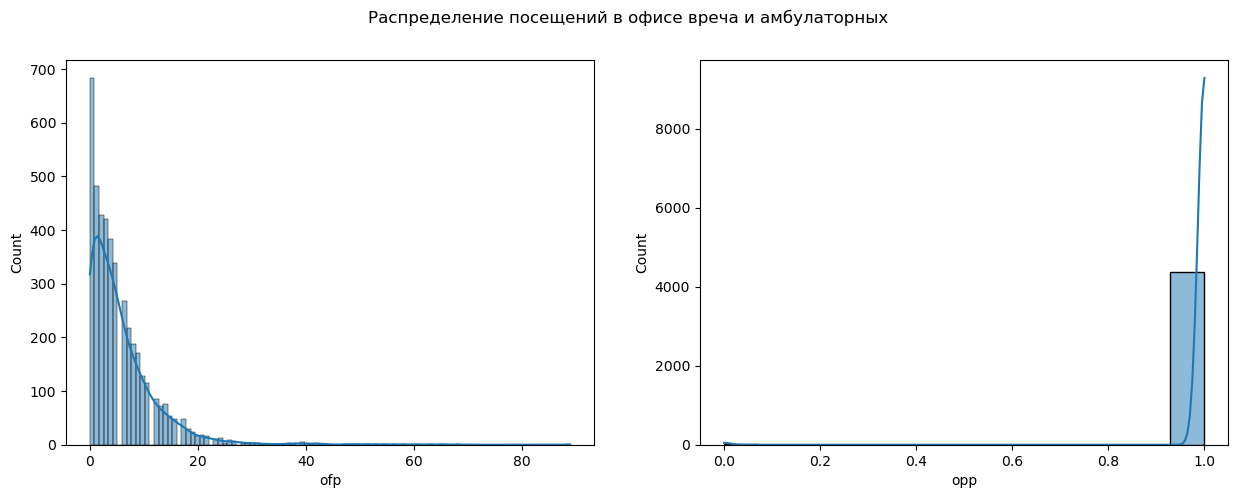

In [59]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.suptitle('Распределение посещений в офисе вреча и амбулаторных')
sns.histplot(df['ofp'], kde = True, ax = ax[0])
sns.histplot(df['opp']<20, kde = True, ax = ax[1])
plt.show()

### Сильное правое смещение - люди ходят к врачу считанные разы. Но редко - постоянно - очевидно по медицинским показаниям о постоянном наблюдении у вреча

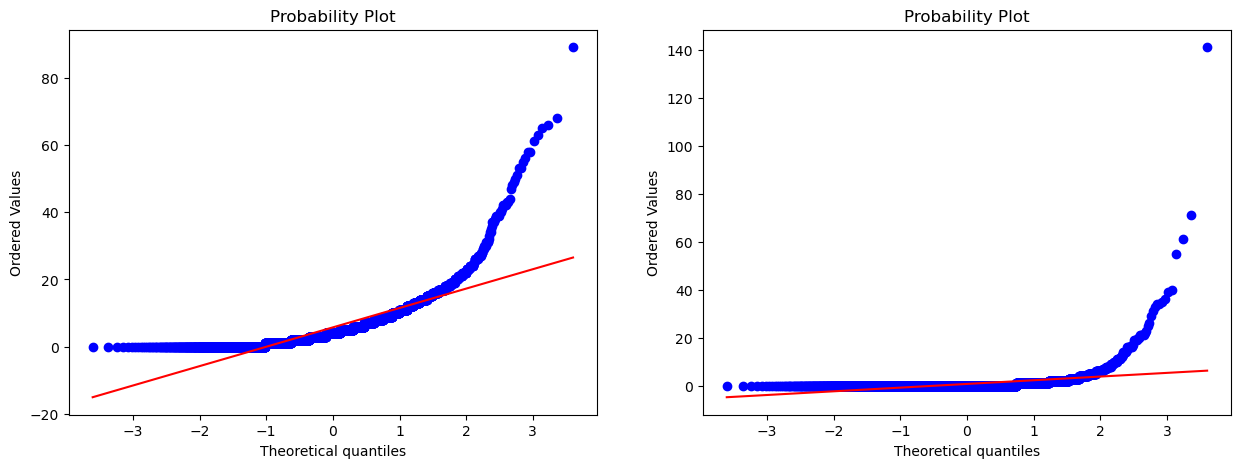

In [61]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.title('QQ-plot для посещений врача')
stats.probplot(df['ofp'], dist="norm", plot = ax[0])
stats.probplot(df['opp'], dist="norm", plot = ax[1])
plt.show()

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

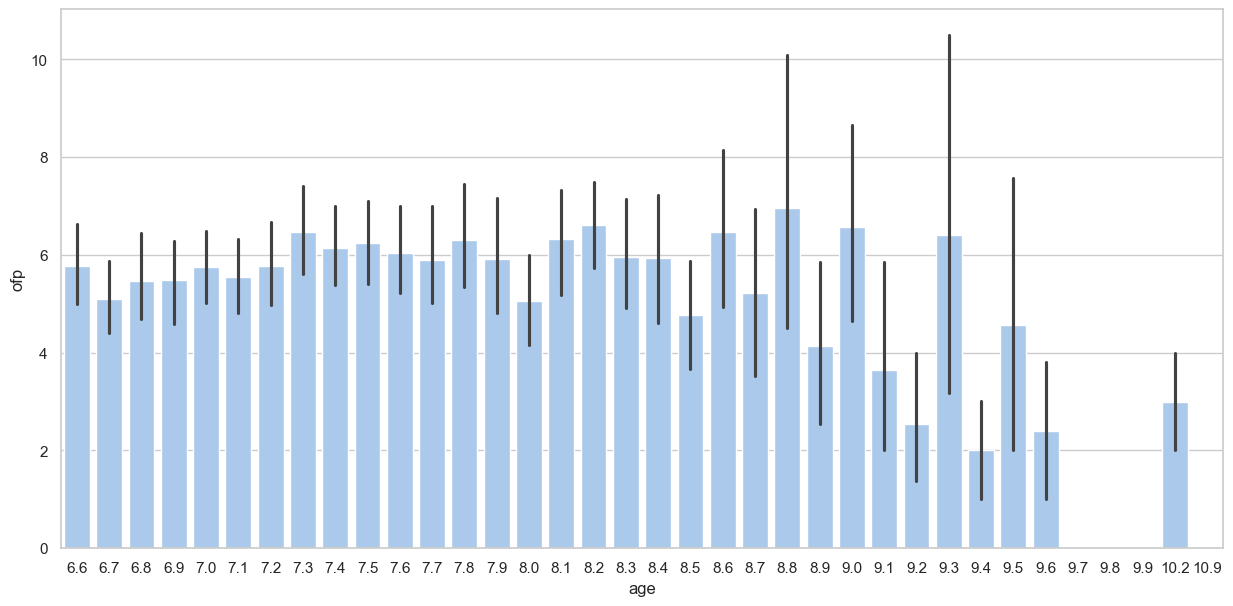

In [103]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize = (15, 7))
sns.barplot(data = df, x = 'age', y = 'ofp')
plt.show() 

#### Данные не позволяют утверждать что 3я гипотеза верна. Надо конечно учитывать что наблюдения имеются с 66 лет. Обращает на себя внимание "эффект зубьев пилы" после 85 лет. Возможно связано с обязательными/необязательными чекапами в США после данного возраста. Либо с бесплатными/платными. В любом случае после 85 лет имеется "зубчатая" тенденция к снижению количества визитов к терапефту (очевидно вляиет средняя продолжительность жизни людей). Ну и 3 обращения в возрасте 102 года выбросом не считаю. Просто очевидено долгожитель ходил к варчу.

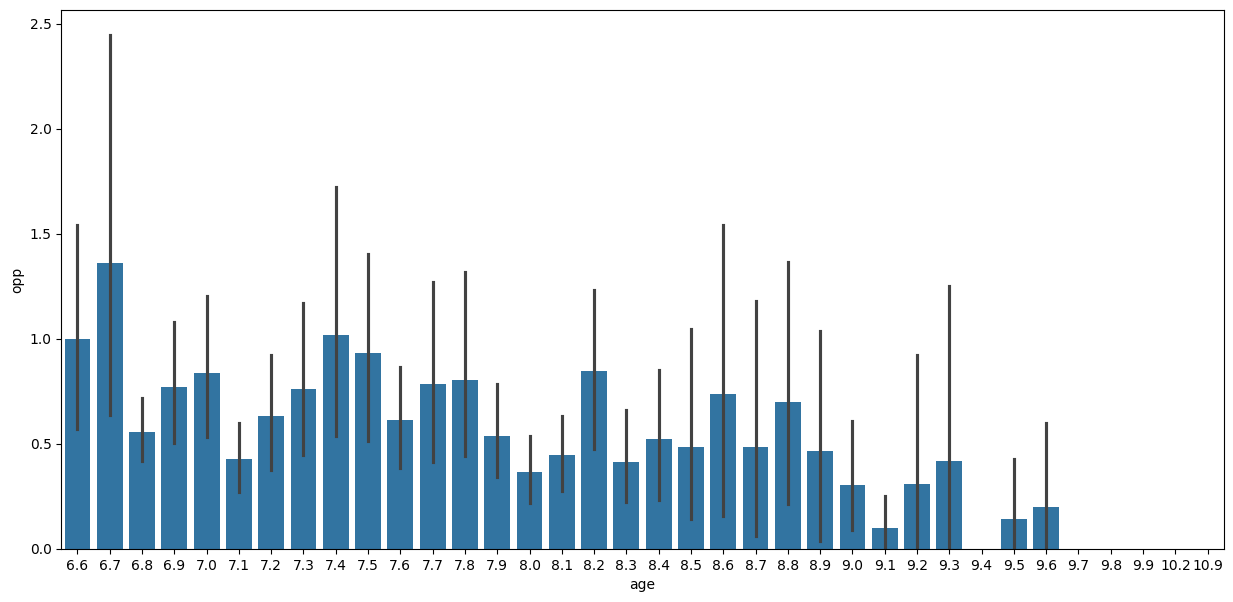

In [21]:
plt.figure(figsize = (15, 7))
sns.barplot(data = df, x = 'age', y = 'opp')
plt.show() 

### На всякий случай проверил амбулаторный прием. Ничего нового не нашел, кроме того, что 102-летний пациент амбулаторно не обращался.

### Линейная регрессия

### посмотрим влияние дохода семьи на количество визиов в офис врача

In [74]:
X = np.array(df['faminc'])
Y = np.array(df['ofp'])
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary()) # Print the table

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1080
Date:                Fri, 15 Nov 2024   Prob (F-statistic):              0.742
Time:                        19:05:58   Log-Likelihood:                -14671.
No. Observations:                4406   AIC:                         2.935e+04
Df Residuals:                    4404   BIC:                         2.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8033      0.135     43.116      0.0

### Получается с ростом дохода на 1 тыс долл количество визитов уменьшается на 0,0114 раза. При этом не зависимо от дохода люди делают по 5,8 визитов.

### Вот кстати доверительный х1 интервал переходит через 0 (-0.080       0.057). Получается не всегда рост доходов снижает количество визитов. Кроме того R-squared нулевой. Предположим что нет значимого влияния.

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
df.head()

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff,age,black,sex,maried,school,faminc,employed,privins,medicaid,region,hlth
0,5,0,0,0,0,1,2,0,6.9,yes,male,yes,6,2.8810,yes,yes,no,other,other
1,1,0,2,0,2,0,2,0,7.4,no,female,yes,10,2.7478,no,yes,no,other,other
2,13,0,0,0,3,3,4,1,6.6,yes,female,no,10,0.6532,no,no,yes,other,poor
3,16,0,5,0,1,1,2,1,7.6,no,male,yes,3,0.6588,no,yes,no,other,poor
4,3,0,0,0,0,0,2,1,7.9,no,female,yes,6,0.6588,no,yes,no,other,other


In [13]:
df['adldiff'].value_counts()

adldiff
0    3507
1     899
Name: count, dtype: int64

In [15]:
data = df[['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'numchron', 'adldiff']]

In [23]:
data.head(10)

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff
0,5,0,0,0,0,1,2,0
1,1,0,2,0,2,0,2,0
2,13,0,0,0,3,3,4,1
3,16,0,5,0,1,1,2,1
4,3,0,0,0,0,0,2,1
5,17,0,0,0,0,0,5,1
6,9,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0


### будем предсказывать наличие у человека услвоий для ограничения активности в повседневной жизни (adldiff) на основе обращений в мед кабинеты (первые 7 столбцов ofp	ofnp	opp	opnp	emr	hosp	numchron)

In [25]:
target = data['adldiff']

In [27]:
X_train, X_test , y_train , y_test = train_test_split (data, target, test_size = 0.4, random_state = 77)

In [29]:
data.shape

(4406, 8)

In [31]:
X_train.shape

(2643, 8)

In [129]:
X_test.shape

(1763, 8)

In [131]:
y_train.shape

(2643,)

In [133]:
y_test.shape

(1763,)

### поделили 60/40

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [37]:
type(y_pred)

numpy.ndarray

In [39]:
type(y_test)

pandas.core.series.Series

In [43]:
y_test.values #чтобы вытащить array

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
type(y_test.values)

numpy.ndarray

In [47]:
type(y_pred)

numpy.ndarray

In [49]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
y_pred.shape

(1763,)

### Ну вот собственно предсказанные значения таргета. Дальше будем смотреть их качество

In [56]:
confusion_matrix(y_pred, y_test.values)

array([[1420,    0],
       [   0,  343]], dtype=int64)

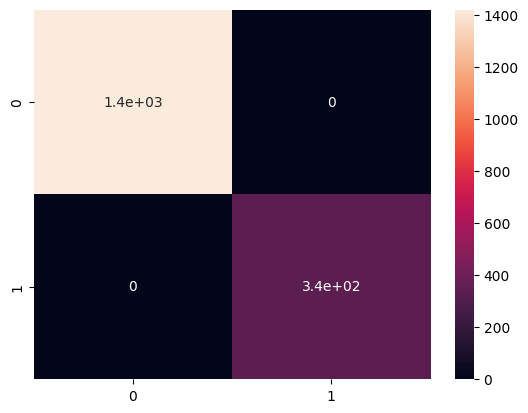

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_pred, y_test.values), annot = True)
plt.show()

In [62]:
from sklearn.metrics import precision_score,recall_score, accuracy_score, f1_score

In [68]:
cm = confusion_matrix(y_test.values, y_pred)
cm

array([[1420,    0],
       [   0,  343]], dtype=int64)

In [75]:
print('Accuracy', accuracy_score(y_test.values, y_pred))
print('Precision', cm[1,1] / (cm[1,1] + cm[0,1])) #precision_score не сработал, возможно потому что тащу "y_test" костылем
print('Recall', recall_score(y_test.values, y_pred))
print('F1', f1_score(y_test.values, y_pred))

Accuracy 1.0
Precision 1.0
Recall 1.0
F1 1.0


### Получается все идеально предсказано? Если честно немного смущают единицы во всех метриках качества но тест есть тест.

### Предсказываемое значение бинарное - посмотрим ROC-AUC

In [77]:
from sklearn.linear_model import LogisticRegression
X = data[['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'numchron']].values
y = data['adldiff'].values
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4, random_state = 77)

In [83]:
X_test

array([[ 0,  0, 15, ...,  1,  2,  4],
       [ 7,  0,  1, ...,  0,  1,  1],
       [ 3,  0,  0, ...,  0,  0,  0],
       ...,
       [29, 36,  3, ...,  0,  2,  2],
       [ 9,  1,  0, ...,  0,  0,  1],
       [ 0,  5,  0, ...,  0,  0,  1]], dtype=int64)

In [85]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
probs= model.predict_proba(X_test)
probs = probs [:, 1]

In [90]:
confusion_matrix(y_test, pred)

array([[1400,   20],
       [ 312,   31]], dtype=int64)

### Метрики качества:

In [93]:
print('Accuracy', accuracy_score(y_test, pred))
print('Precision', precision_score(y_test, pred))
print('Recall', recall_score(y_test, pred))
print('F1', f1_score(y_test, pred))

Accuracy 0.8116846284741918
Precision 0.6078431372549019
Recall 0.09037900874635568
F1 0.15736040609137056


In [97]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, probs)
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
auc_score

0.6973032069970846

### Отрисуем оценку:

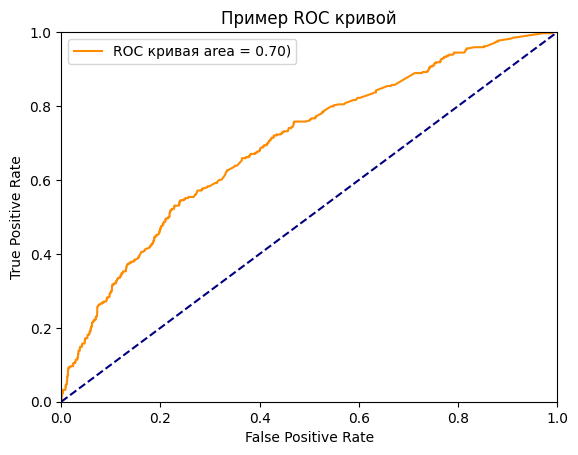

In [100]:
plt.plot(fpr, tpr, color = 'darkorange', label ='ROC кривая area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC кривой')
plt.legend()
plt.show()

### Ну в целом неплохая метрика. auc_score 0,7 и график явно не пересекает синюю линию. Уверено растет до середины оси х. И сходится с синей в 1 - тоже не плохо.

### Регрессия:

In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [112]:
data.head()

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff
0,5,0,0,0,0,1,2,0
1,1,0,2,0,2,0,2,0
2,13,0,0,0,3,3,4,1
3,16,0,5,0,1,1,2,1
4,3,0,0,0,0,0,2,1


In [137]:
target = data['adldiff']

In [139]:
target.head()

0    0
1    0
2    1
3    1
4    1
Name: adldiff, dtype: int64

In [116]:
X_train, X_test , y_train , y_test = train_test_split (data, target, test_size =0.4, random_state = 77)

In [126]:
regressor = DecisionTreeRegressor(max_depth = 10)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

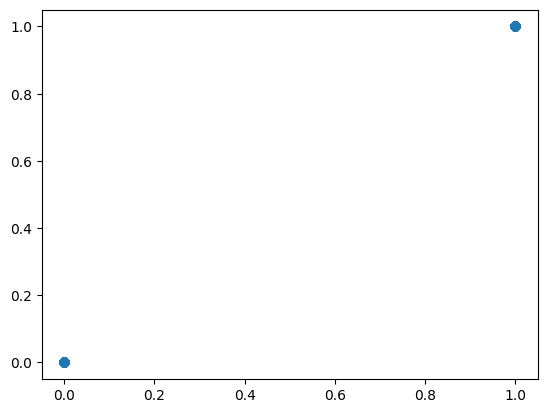

In [133]:
plt.scatter(x = y_test, y = y_pred)
plt.show

In [130]:
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
mape = mean_absolute_percentage_error(y_test , y_pred)
print('MSE', mse)
print('MAE', mae)
print('MAPE', mape)

MSE 0.0
MAE 0.0
MAPE 0.0


### Вот тут я немного сомневаюсь: вроде бы точки на одной прямой (это хорошо как я понял из лекции). Но их всего две - это смущает.